#CUSTOMER SEGMENTATION ASSIGMENT

ROGGERS ANGUZU 667137



In [34]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#DATA EXPLORATION AND PREPROCESSION

In [35]:
import kagglehub
import os

path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)

csv_file_name = 'Mall_Customers.csv'
file_path = os.path.join(path, csv_file_name)

df = pd.read_csv(file_path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [40]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [41]:
df_cleaned = df.drop(['CustomerID'], axis=1)
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 0, 'Female': 1})


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)

df_scaled = pd.DataFrame(scaled_features, columns=df_cleaned.columns)
print(df_scaled.head())


     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0 -1.128152 -1.424569           -1.738999               -0.434801
1 -1.128152 -1.281035           -1.738999                1.195704
2  0.886405 -1.352802           -1.700830               -1.715913
3  0.886405 -1.137502           -1.700830                1.040418
4  0.886405 -0.563369           -1.662660               -0.395980


#Pair plots

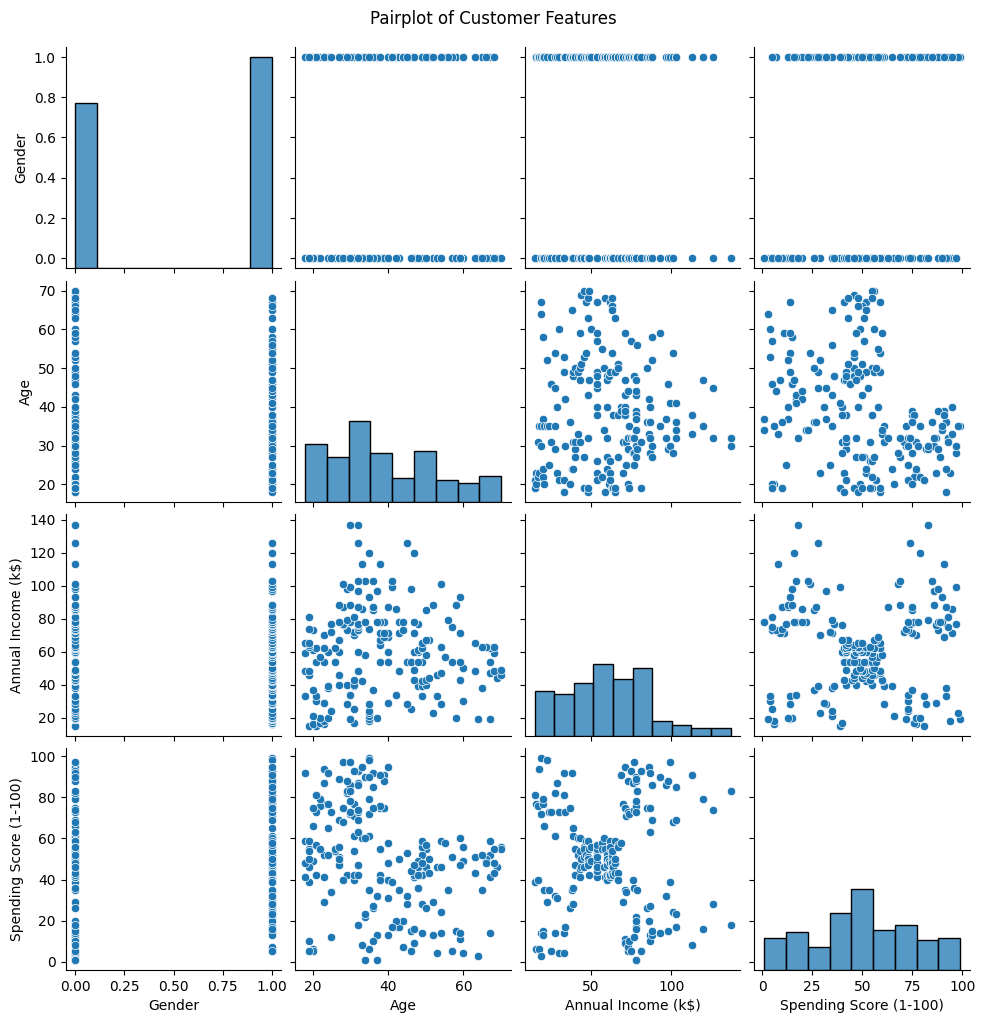

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_cleaned)
plt.suptitle("Pairplot of Customer Features", y=1.02)
plt.show()

#Histogram

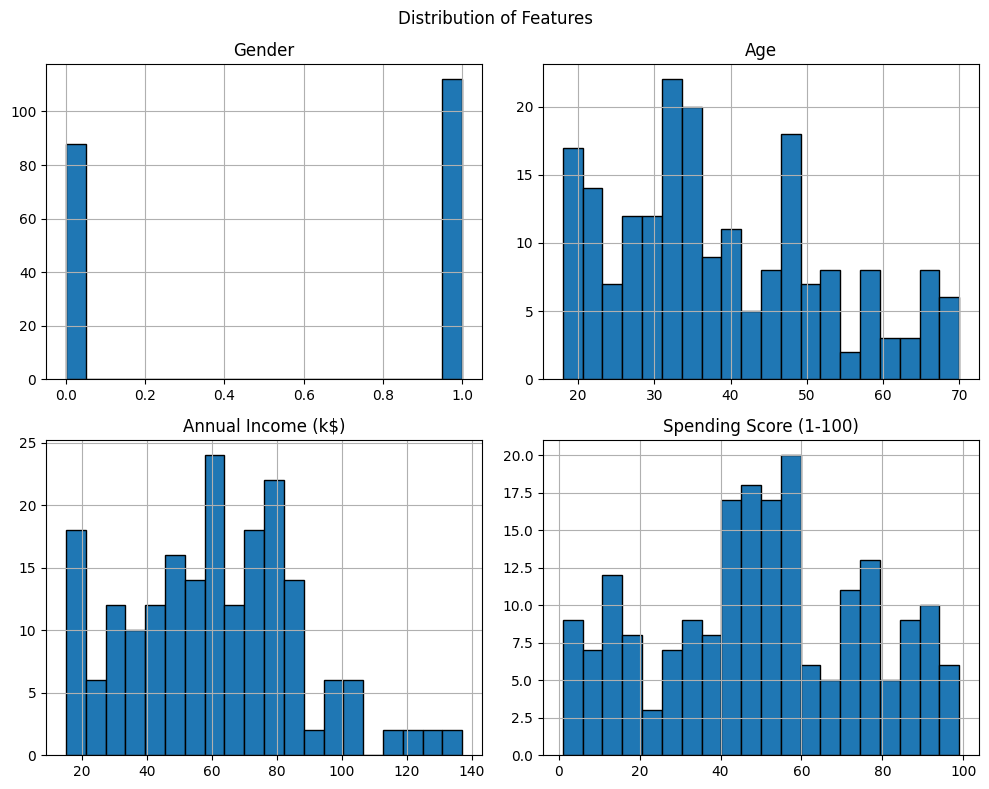

In [44]:
df_cleaned.hist(bins=20, figsize=(10, 8), edgecolor='black')
plt.suptitle("Distribution of Features")
plt.tight_layout()
plt.show()


#Analysis

Annual Income vs Spending Score shows clear segmentation some customers with high income spend less and vice versa.

Age Distribution is skewed slightly toward younger customers

Genre seems evenly distributed across the dataset but shows potential variation in Spending Score when combined with Age.

The Spending Score appears to have two main clusters: low and high spenders.

There are customers with moderate income but very different spending behaviors, making them interesting for segmentation.




#K-Means Clustering and Elbow Method

In [46]:
from sklearn.cluster import KMeans

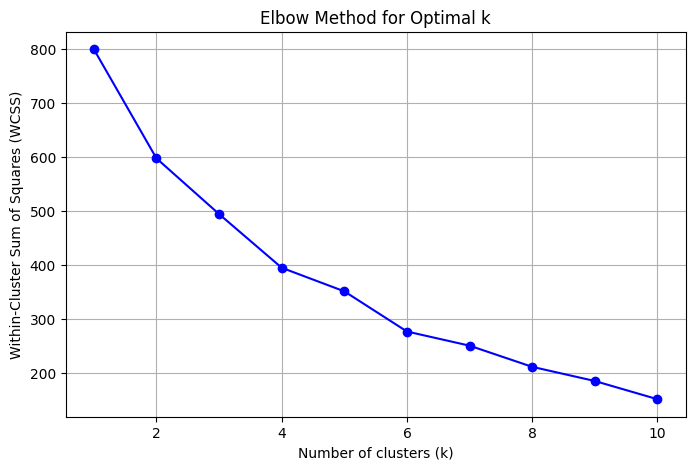

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Calculate WCSS for different values of k
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


The elbow method suggests that 5 clusters is the optimal number

#Visualize the clusters

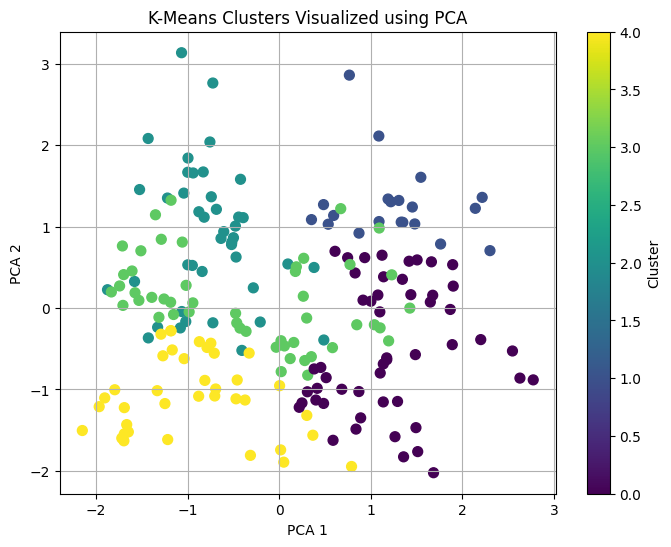

In [48]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df_cleaned['Cluster'] = clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clusters Visualized using PCA')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [49]:
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

cluster_profiles = df_clustered.groupby('Cluster').mean(numeric_only=True)
print(cluster_profiles)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         65.333333  56.470588           46.098039               39.313725
1        159.500000  39.500000           85.150000               14.050000
2        100.809524  28.690476           60.904762               70.238095
3        151.510204  37.897959           82.122449               54.448980
4         50.526316  27.315789           38.842105               56.210526


In [50]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt


#Agglomerative Clustering

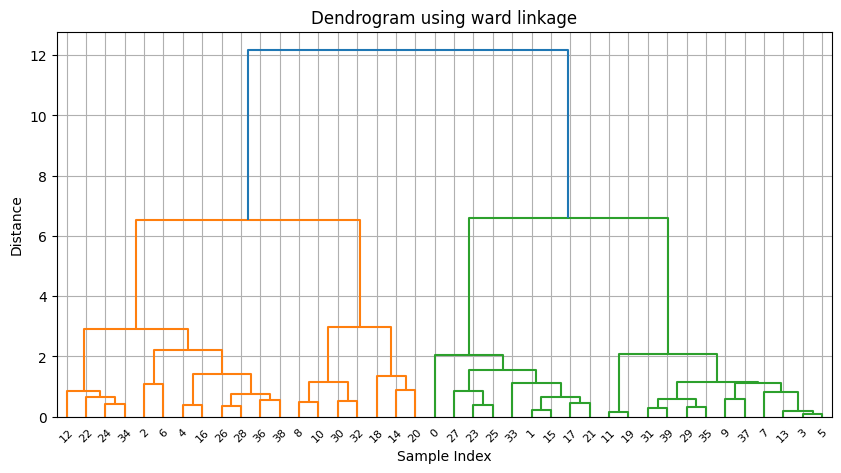

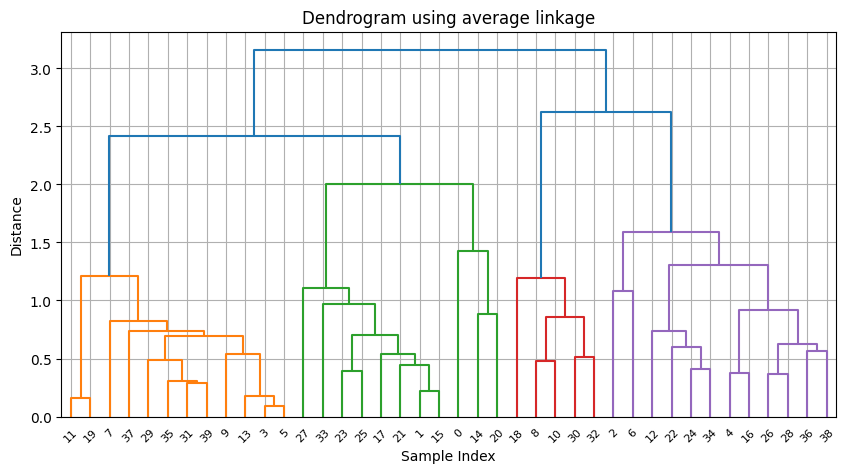

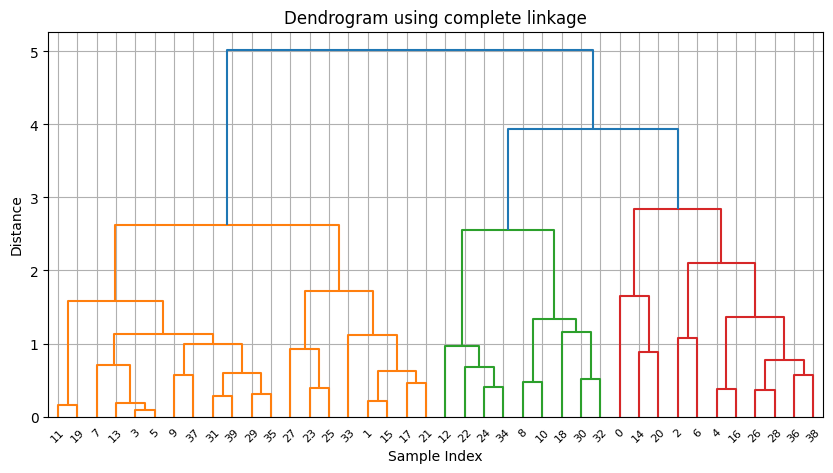

In [51]:

sample_data = scaled_data[:40]

linkage_methods = ['ward', 'average', 'complete']

for method in linkage_methods:
    plt.figure(figsize=(10, 5))
    Z = linkage(sample_data, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram using {method} linkage')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()


#Agglomerative Clustering for each linkage

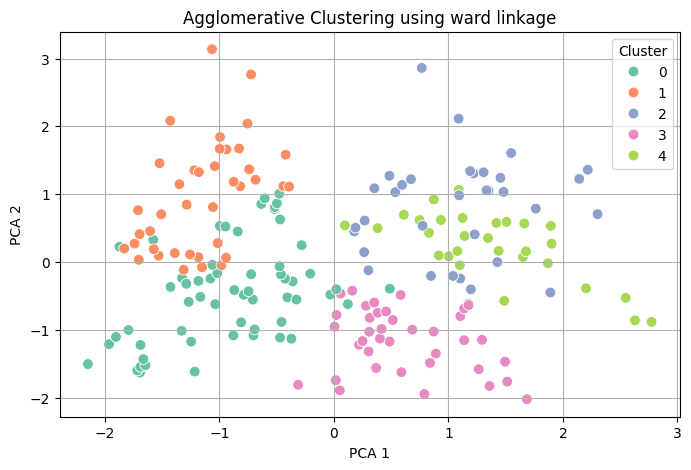

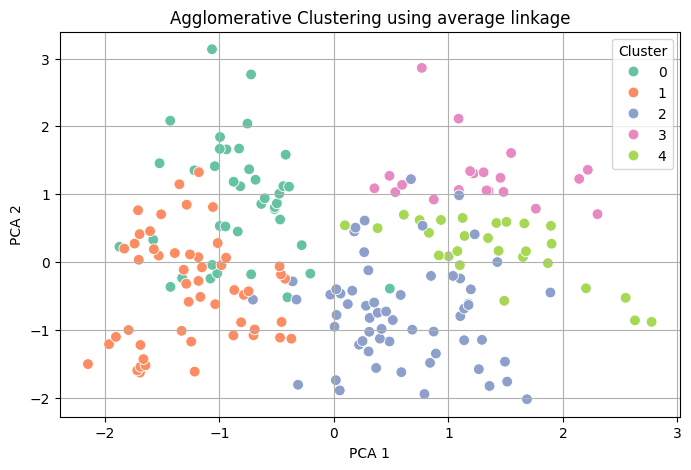

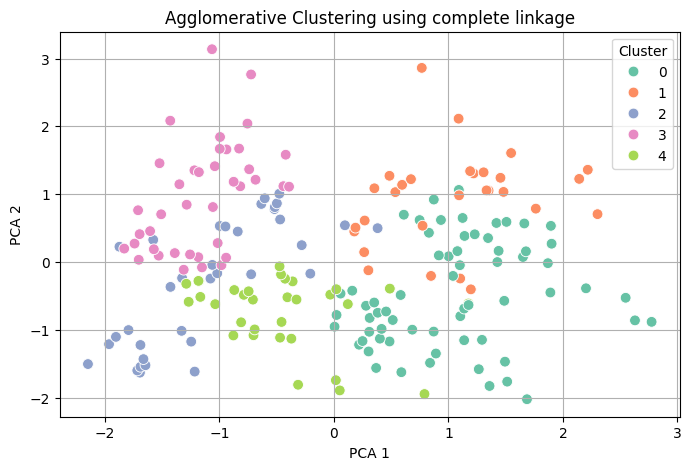

In [52]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

for method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels = model.fit_predict(scaled_data)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='Set2', s=60)
    plt.title(f'Agglomerative Clustering using {method} linkage')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.legend(title='Cluster')
    plt.show()


K-Means assumes spherical clusters and uses centroid-based distance.

Hierarchical clustering does not assume cluster shapes and can capture nested and unevenly sized clusters.

Agglomerative clustering often produces more natural groupings in data with non-uniform distributions.

In the Mall Customers dataset, Ward linkage typically produces the most meaningful clusters when compared visually and through separation.

#Dimensionality Reduction (PCA)

In [53]:
from sklearn.decomposition import PCA

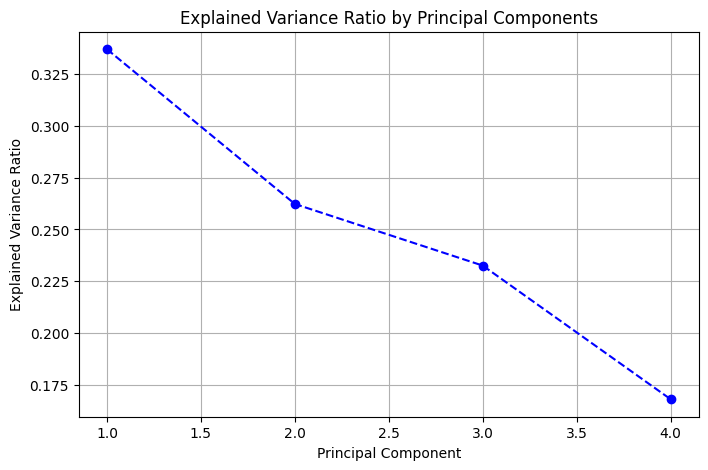

In [54]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

kmeans_labels = kmeans.labels_


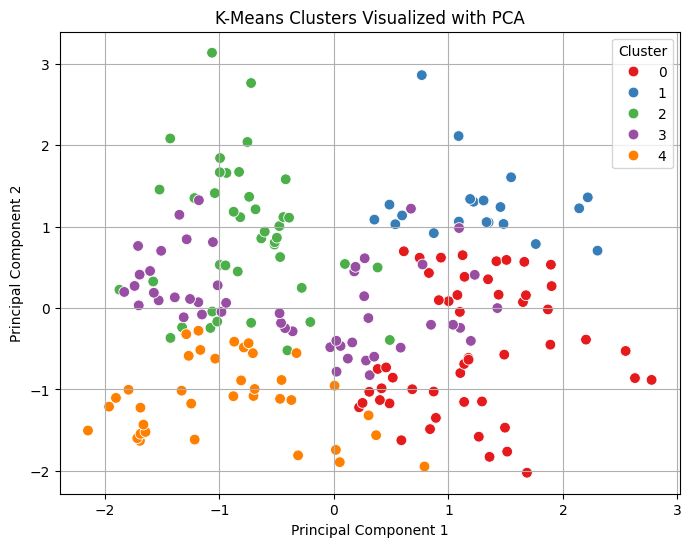

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data_2d[:, 0], y=pca_data_2d[:, 1], hue=kmeans_labels, palette='Set1', s=60)
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data_2d = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
total_variance = explained_variance.sum()

print("Explained variance by first two components:", explained_variance)
print("Total variance explained:", total_variance)


Explained variance by first two components: [0.33690046 0.26230645]
Total variance explained: 0.5992069019819846


PCA helps in reducing high-dimensional data  to just 2 dimensions while preserving as much variance  as possible.

#Dimensionality Reduction

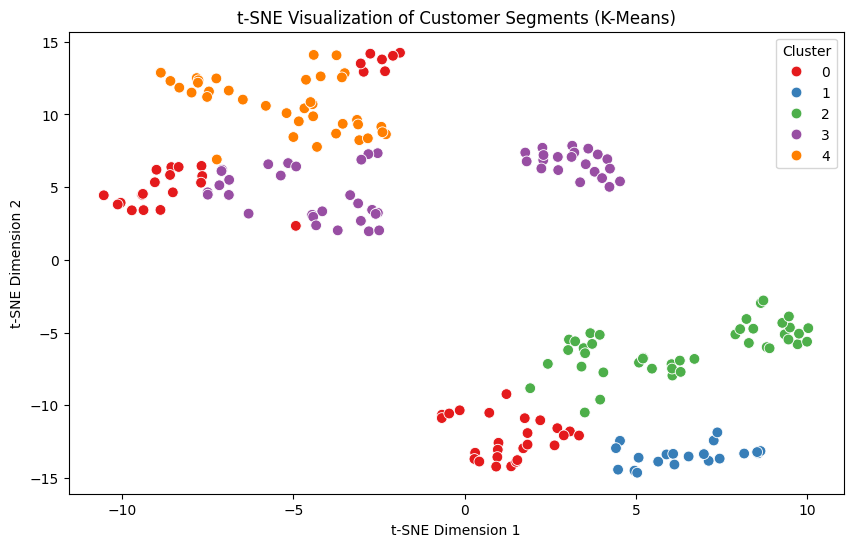

In [58]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=kmeans_labels, palette="Set1", s=60)
plt.title('t-SNE Visualization of Customer Segments (K-Means)')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()


#Analysis

PCA is a linear dimensionality reduction technique that projects the data into directions of maximum variance.

t-SNE is a nonlinear technique designed for local structure preservation. It maps similar instances closer together in low-dimensional space and separates dissimilar ones

#Cluster Quality with Silhouette Score

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5, linkage='ward')
hier_labels = agglo.fit_predict(scaled_data)


In [61]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
hier_silhouette = silhouette_score(scaled_data, hier_labels)

print(f"Silhouette Score for K-Means: {kmeans_silhouette:.3f}")
print(f"Silhouette Score for Hierarchical Clustering: {hier_silhouette:.3f}")


Silhouette Score for K-Means: 0.272
Silhouette Score for Hierarchical Clustering: 0.287
